In [11]:
import numpy as np
import pandas as pd 
import scipy as sp
np.random.seed(42)

In [2]:
df1 = pd.read_csv('S07-hw-dataset-01.csv')

In [3]:
df2 = pd.read_csv('S07-hw-dataset-02.csv')

In [5]:
df3 = pd.read_csv('S07-hw-dataset-03.csv')

Разберем первый датасет

In [6]:
df1.head()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [8]:
df1.describe()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [9]:
df1.isnull().sum()

sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64

In [10]:
df1.dtypes

sample_id      int64
f01          float64
f02          float64
f03          float64
f04          float64
f05          float64
f06          float64
f07          float64
f08          float64
dtype: object

In [12]:
X = df1.drop('sample_id', axis = 1)

In [13]:
X

,f01,f02,f03,f04,f05,f06,f07,f08
0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213
...,...,...,...,...,...,...,...,...
11995,15.358432,56.974156,-1.089617,-95.891749,8.909345,26.123207,-20.786813,-0.681086
11996,-5.781842,71.198182,-0.201762,-54.336472,4.903560,-3.287724,-48.875539,0.172566
11997,-7.573306,70.017900,-0.159869,17.167497,-3.809988,-5.356308,-98.751869,0.836130
11998,13.856888,88.341387,-1.429989,-101.905925,10.759963,29.308895,-19.837802,0.300104


In [356]:
sample_id_df1 = df1[['sample_id']]

In [15]:
sample_id

,sample_id
0,0
1,1
2,2
3,3
4,4
...,...
11995,11995
11996,11996
11997,11997
11998,11998


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
)
import matplotlib.pyplot as plt

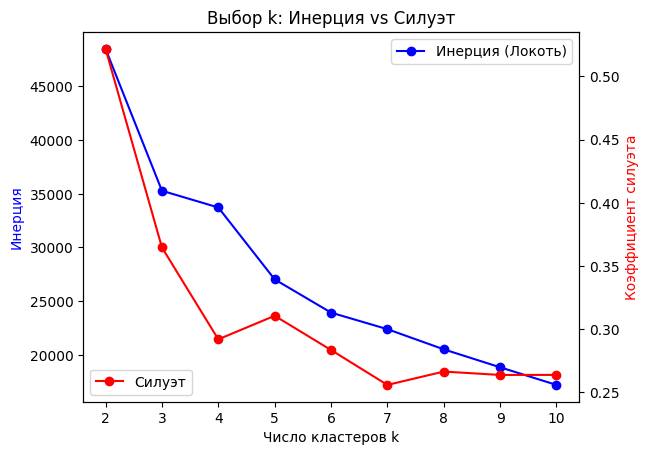

In [30]:
k_values = list(range(2,11))

inertia = []
silhouette = []
for k in k_values:
    kmeans_model = Pipeline([
        ('scaler', StandardScaler()),
         ('KMeans', KMeans(n_clusters=k, n_init='auto', random_state=42))
    ])
    kmeans_model.fit(X)
    inertia.append(kmeans_model[1].inertia_)
    silhouette.append(silhouette_score(kmeans_model[0].transform(X), kmeans_model[1].labels_))
fig, ax1 = plt.subplots()

ax1.plot(k_values, inertia, 'bo-', label='Инерция (Локоть)')
ax1.set_xlabel('Число кластеров k')
ax1.set_ylabel('Инерция', color='b')

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette, 'ro-', label='Силуэт')
ax2.set_ylabel('Коэффициент силуэта', color='r')

plt.title('Выбор k: Инерция vs Силуэт')
ax1.legend(loc='upper right')
ax2.legend(loc='lower left')
plt.savefig('artifacts/figures/K_vs_inertia_silhouette_KMeans_Dataset01.jpg')
plt.show()

По данным графикам метрик сложно сказать точно оптимальное количество кластеров, но более вероятно это 2, поскольку обе метрики достигают максимального значения в точке 2. Лучше воспользоваться дополнительными эвристиками

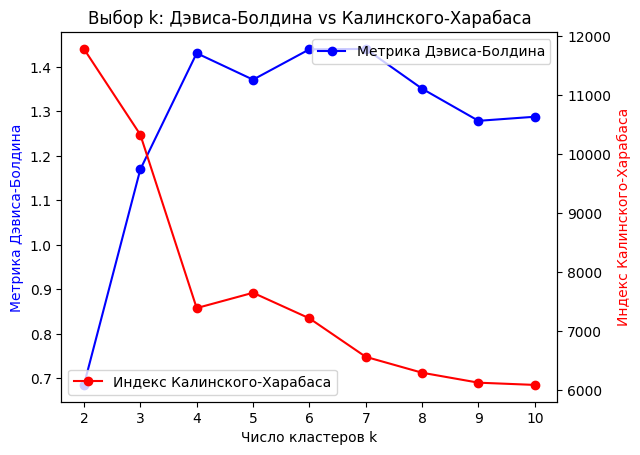

In [32]:
k_values = list(range(2,11))

davies_bouldin = []
calinski_harabasz = []
for k in k_values:
    kmeans_model = Pipeline([
        ('scaler', StandardScaler()),
         ('KMeans', KMeans(n_clusters=k, n_init='auto', random_state=42))
    ])
    kmeans_model.fit(X)
    X_scaled = kmeans_model[0].transform(X)
    labels = kmeans_model[1].labels_
    
    davies_bouldin.append(davies_bouldin_score(X_scaled, labels))
    calinski_harabasz.append(calinski_harabasz_score(X_scaled, labels))

fig, ax1 = plt.subplots()

ax1.plot(k_values, davies_bouldin, 'bo-', label='Метрика Дэвиса-Болдина')
ax1.set_xlabel('Число кластеров k')
ax1.set_ylabel('Метрика Дэвиса-Болдина', color='b')

ax2 = ax1.twinx()
ax2.plot(k_values, calinski_harabasz, 'ro-', label='Индекс Калинского-Харабаса')
ax2.set_ylabel('Индекс Калинского-Харабаса', color='r')

plt.title('Выбор k: Дэвиса-Болдина vs Калинского-Харабаса')
ax1.legend(loc='upper right')
ax2.legend(loc='lower left')
plt.savefig('artifacts/figures/K_vs_DaviesBouldin_CalinskiHarabasz_KMeans_Dataset01.jpg')
plt.show()

В данном случае стало очевидно, что количество кластеров, равное 2, является оптимальным значением для поставленной задачи, поскольку метрика Дэвиса-Болдина принимает минимальное значение, а индекс Калинского-Харабаса максимальное

In [56]:
kmeans_model_df1 = Pipeline([
        ('scaler', StandardScaler()),
         ('KMeans', KMeans(n_clusters=2, n_init='auto', random_state=42))
    ])
kmeans_model_df1.fit(X)
labels = kmeans_model_df1[1].labels_

In [57]:
silhouette_score(X_scaled, labels)

np.float64(0.5216395622404242)

In [58]:
davies_bouldin_score(X_scaled, labels)

np.float64(0.6853295219054457)

In [59]:
calinski_harabasz_score(X_scaled, labels)

np.float64(11786.954622671532)

In [35]:
from sklearn.neighbors import NearestNeighbors

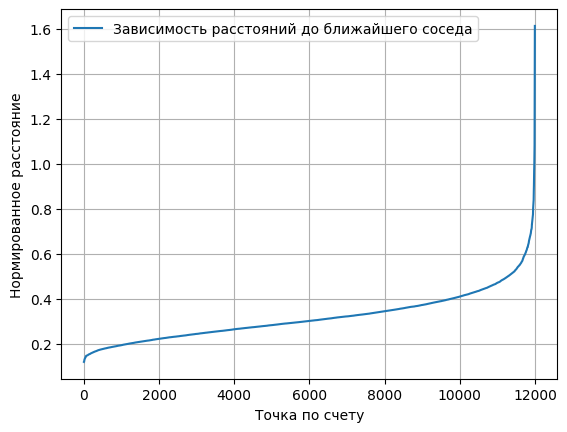

In [41]:
X_scaled = StandardScaler().fit_transform(X)

neighbors = NearestNeighbors(n_neighbors=8)
neighbors.fit(X_scaled)

distance, _ = neighbors.kneighbors(X_scaled)

distance = np.sort(distance[:, 3], axis=0)
plt.plot(distance, label = 'Зависимость расстояний до ближайшего соседа')
plt.xlabel('Точка по счету')
plt.ylabel('Нормированное расстояние')
plt.legend()
plt.savefig('artifacts/figures/distance_DBSCAN_DATASET01.jpg')
plt.grid(True)
plt.show()

Из графика видно то, что оптимальное значение eps равно 0.4, поскольку именно в этом месте происходит изгиб кривой

In [45]:
db_model_df1 = Pipeline([
    ('scaler', StandardScaler()),
    ('DBSCAN', DBSCAN(eps=0.4, min_samples=16))
])

Возьмем min_samples в два раза больше чем кол-во признаков

In [60]:
db_model_df1.fit(X)

Pipeline(steps=[('scaler', StandardScaler()),
                ('DBSCAN', DBSCAN(eps=0.4, min_samples=16))])

In [65]:
labels = db_model_df1[1].labels_

In [70]:
noise_index = np.where(labels == -1)

noise_index

Находим индексы тех точек, у которых labels равен -1, т.е. точки, которые были признаны шумовыми

In [76]:
X_non_noise = np.delete(X_scaled, noise_index, axis = 0)

In [77]:
X_non_noise

array([[ 0.17142668, -1.46280499,  0.43827875, ..., -0.89591542,
        -0.11539556, -0.84301268],
       [-0.91831503, -1.00048459,  0.73617818, ...,  0.07106513,
        -0.67122564,  0.21689135],
       [-0.40660969,  0.70286533,  0.39870815, ..., -0.43490498,
         0.11702228,  0.20357459],
       ...,
       [ 1.61461601,  0.6229268 , -1.7329965 , ...,  1.70069422,
        -0.349694  , -1.13458527],
       [-0.30480934,  0.85692153,  0.04055255, ..., -0.28732381,
        -0.82146181,  0.27169879],
       [-1.16571448, -0.849189  ,  0.87345715, ...,  0.09937317,
        -1.7957767 , -0.92784466]], shape=(8226, 8))

In [80]:
labels = labels[labels != -1]

Считаем метрики только по тем точками, которые не были признаными шумовыми

In [81]:
silhouette_score(X_non_noise, labels)

np.float64(0.37094709104884954)

In [82]:
davies_bouldin_score(X_non_noise, labels)

np.float64(0.9579347132872101)

In [83]:
calinski_harabasz_score(X_non_noise, labels)

np.float64(5563.126364203319)

По всем метрикам качества для данного датасета KMeans оказался самым эффективных алгоритмом

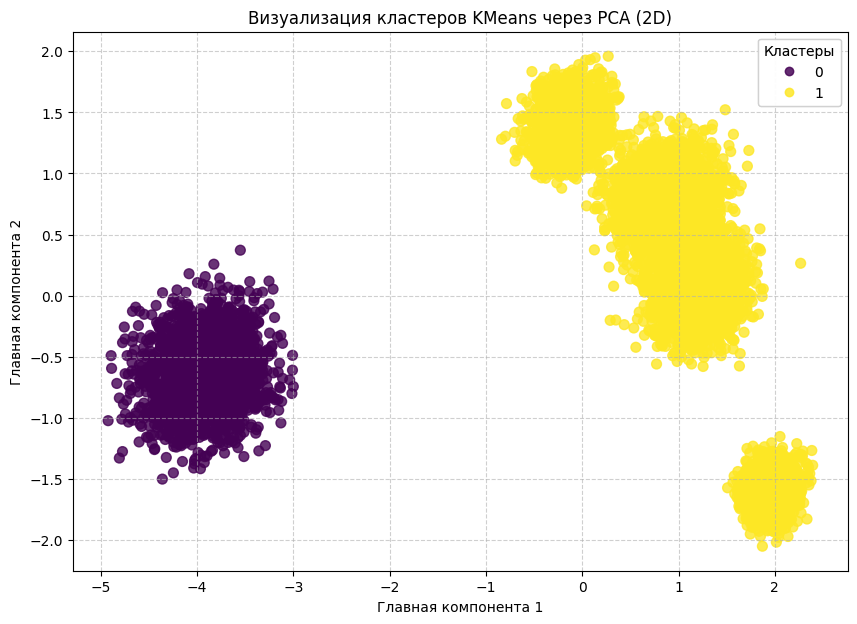

In [88]:
labels = kmeans_model_df1[1].labels_
pca_df1 = PCA(n_components=2)
X_pca = pca_df1.fit_transform(X_scaled)
plt.figure(figsize=(10, 7))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
legend1 = plt.legend(*scatter.legend_elements(), title="Кластеры")
plt.gca().add_artist(legend1)

plt.title('Визуализация кластеров KMeans через PCA (2D)')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('artifacts/figures/PCA(2D)_DATASET01_KMeans.jpg')
plt.show()

In [87]:
X_pca

array([[ 2.20777302, -1.57140682],
       [-4.13355321, -0.62380202],
       [-4.13100373, -0.44713797],
       ...,
       [ 0.6056962 ,  0.82281661],
       [-4.1723896 , -0.23447762],
       [ 1.14600445,  0.14169964]], shape=(12000, 2))

Рассмотрим второй датасет 

In [89]:
df2.head()

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


In [91]:
df2.describe()

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


In [92]:
df2.isnull().sum()

sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64

In [93]:
df2.dtypes

sample_id      int64
x1           float64
x2           float64
z_noise      float64
dtype: object

In [355]:
sample_id_df2 = df2['sample_id']

In [336]:
X = df2.drop('sample_id', axis=1)

In [337]:
X

,x1,x2,z_noise
0,0.098849,-1.846034,21.288122
1,-1.024516,1.829616,6.072952
2,-1.094178,-0.158545,-18.938342
3,-1.612808,-1.565844,-11.629462
4,1.659901,-2.133292,1.895472
...,...,...,...
7995,0.396444,-0.258826,1.866578
7996,0.540757,-0.290802,5.437638
7997,0.672079,0.675018,-2.488673
7998,1.871350,0.290634,-0.852787


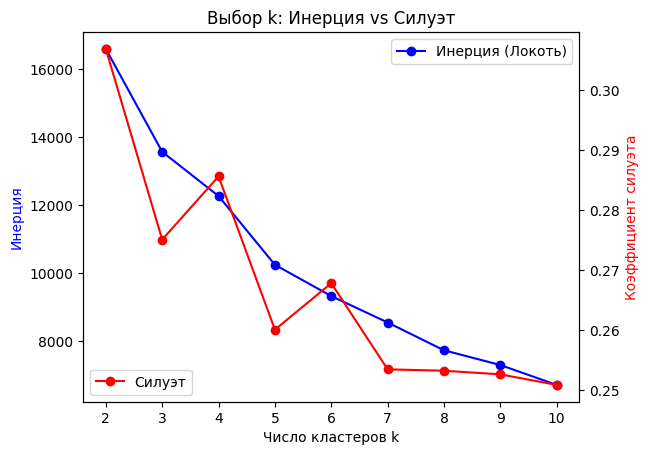

In [96]:
k_values = list(range(2,11))

inertia = []
silhouette = []
for k in k_values:
    kmeans_model = Pipeline([
        ('scaler', StandardScaler()),
         ('KMeans', KMeans(n_clusters=k, n_init='auto', random_state=42))
    ])
    kmeans_model.fit(X)
    inertia.append(kmeans_model[1].inertia_)
    silhouette.append(silhouette_score(kmeans_model[0].transform(X), kmeans_model[1].labels_))
fig, ax1 = plt.subplots()

ax1.plot(k_values, inertia, 'bo-', label='Инерция (Локоть)')
ax1.set_xlabel('Число кластеров k')
ax1.set_ylabel('Инерция', color='b')

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette, 'ro-', label='Силуэт')
ax2.set_ylabel('Коэффициент силуэта', color='r')

plt.title('Выбор k: Инерция vs Силуэт')
ax1.legend(loc='upper right')
ax2.legend(loc='lower left')
plt.savefig('artifacts/figures/K_vs_inertia_silhouette_KMeans_Dataset02.jpg')
plt.show()

Как и в первом датасете нельзя точно сказать оптимальное количество кластеров по данным метрикам, но более вероятно это 2

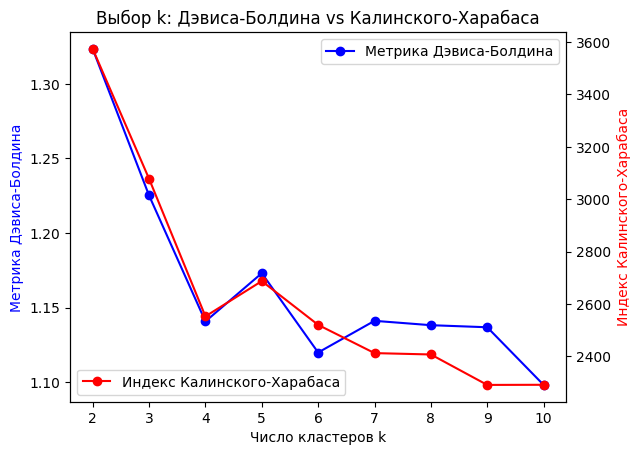

In [97]:
k_values = list(range(2,11))

davies_bouldin = []
calinski_harabasz = []
for k in k_values:
    kmeans_model = Pipeline([
        ('scaler', StandardScaler()),
         ('KMeans', KMeans(n_clusters=k, n_init='auto', random_state=42))
    ])
    kmeans_model.fit(X)
    X_scaled = kmeans_model[0].transform(X)
    labels = kmeans_model[1].labels_
    
    davies_bouldin.append(davies_bouldin_score(X_scaled, labels))
    calinski_harabasz.append(calinski_harabasz_score(X_scaled, labels))

fig, ax1 = plt.subplots()

ax1.plot(k_values, davies_bouldin, 'bo-', label='Метрика Дэвиса-Болдина')
ax1.set_xlabel('Число кластеров k')
ax1.set_ylabel('Метрика Дэвиса-Болдина', color='b')

ax2 = ax1.twinx()
ax2.plot(k_values, calinski_harabasz, 'ro-', label='Индекс Калинского-Харабаса')
ax2.set_ylabel('Индекс Калинского-Харабаса', color='r')

plt.title('Выбор k: Дэвиса-Болдина vs Калинского-Харабаса')
ax1.legend(loc='upper right')
ax2.legend(loc='lower left')
plt.savefig('artifacts/figures/K_vs_DaviesBouldin_CalinskiHarabasz_KMeans_Dataset02.jpg')
plt.show()

Из данных эвристик можно сразу сказать, что KMeans для данного датасета не подходит, поскольку метрика Дэвиса-Болдина должна быть минимально, а индекс Калинского-Харабаса максимальным, но в данном случае они совпадают, что говорит о невозможности подбора оптимального количества кластеров, разве только в точке 6 индекс Калинского-Харабаса немного больше чем метрика Дэвиса-Болдина

In [98]:
kmeans_model_df2 = Pipeline([
        ('scaler', StandardScaler()),
         ('KMeans', KMeans(n_clusters=6, n_init='auto', random_state=42))
    ])
kmeans_model_df2.fit(X)
labels = kmeans_model_df2[1].labels_

In [338]:
X_scaled = kmeans_model_df2[0].transform(X)

In [101]:
silhouette_score(X_scaled, labels)

np.float64(0.2678202442769679)

In [103]:
davies_bouldin_score(X_scaled, labels)

np.float64(1.1198235530267437)

In [104]:
calinski_harabasz_score(X_scaled, labels)

np.float64(2519.8986528368573)

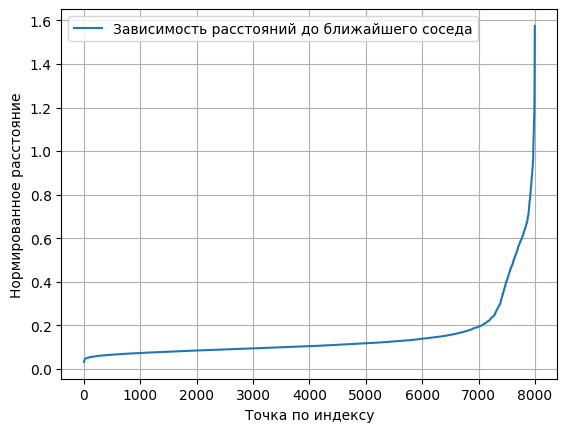

In [106]:
neighbors = NearestNeighbors(n_neighbors=8)
neighbors.fit(X_scaled)

distance, _ = neighbors.kneighbors(X_scaled)

distance = np.sort(distance[:, 3], axis=0)
plt.plot(distance, label = 'Зависимость расстояний до ближайшего соседа')
plt.xlabel('Точка по индексу')
plt.ylabel('Нормированное расстояние')
plt.legend()
plt.savefig('artifacts/figures/distance_DBSCAN_DATASET02.jpg')
plt.grid(True)
plt.show()

Видим то, что для DBSCAN оптимальное значение eps равно 0.2

Сопоставим min_samples с silhouette_score:

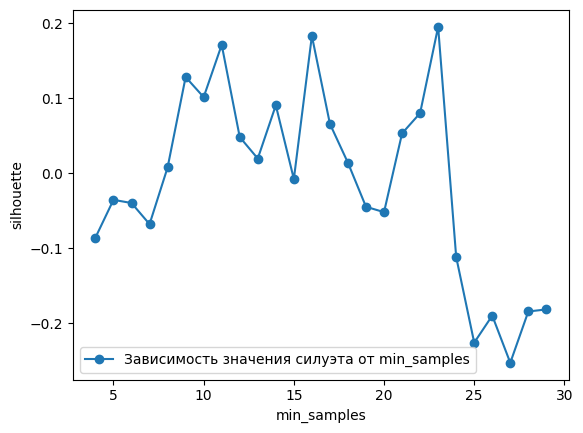

In [223]:
min_samples_values = list(range(4, 30))

silhouette = []
for min_samples_value in min_samples_values:
    db_model_df2 = Pipeline([
    ('scaler', StandardScaler()),
    ('DBSCAN', DBSCAN(eps=0.2, min_samples=min_samples_value))
    ])
    db_model_df2.fit(X)
    labels = db_model_df2[1].labels_
    noise_index = np.where(labels == -1)
    X_non_noise = np.delete(X_scaled, noise_index, axis = 0)
    labels = labels[labels != -1]
    silhouette.append(silhouette_score(X_non_noise, labels))

plt.plot(min_samples_values, silhouette, label = 'Зависимость значения силуэта от min_samples', marker ='o')
plt.legend()
plt.xlabel('min_samples')
plt.ylabel('silhouette')
plt.savefig('artifacts/figures/DBScan_min_samples_vs_silhouette_DATASET02.jpg')
plt.show()

In [224]:
np.argmax(silhouette)+4

np.int64(23)

In [225]:
db_model_df2 = Pipeline([
    ('scaler', StandardScaler()),
    ('DBSCAN', DBSCAN(eps=0.2, min_samples=23))
])

In [226]:
db_model_df2.fit(X)

Pipeline(steps=[('scaler', StandardScaler()),
                ('DBSCAN', DBSCAN(eps=0.2, min_samples=23))])

In [339]:
labels = db_model_df2[1].labels_

In [340]:
noise_index = np.where(labels == -1)

In [341]:
noise_index

(array([   0,    1,    2, ..., 7988, 7991, 7994], shape=(2449,)),)

In [342]:
X_non_noise = np.delete(X_scaled, noise_index, axis = 0)

In [343]:
labels = labels[labels != -1]

In [344]:
labels

array([1, 1, 0, ..., 1, 0, 0], shape=(5551,))

In [345]:
X_non_noise

array([[-0.37845717,  0.89430452,  0.52761534],
       [-0.53137832,  0.94174554,  1.01908496],
       [ 1.77527436,  0.21361473, -0.34106911],
       ...,
       [ 0.20229915,  0.65430629, -0.32099036],
       [ 1.45797826,  0.07467672, -0.11895964],
       [ 1.52913739, -0.59689713, -0.70895773]], shape=(5551, 3))

In [346]:
silhouette_score(X_non_noise, labels)

np.float64(0.19523051842190092)

In [347]:
davies_bouldin_score(X_non_noise, labels)

np.float64(1.0987786634422887)

In [348]:
calinski_harabasz_score(X_non_noise, labels)

np.float64(1629.3914939619085)

В данном случае по silhouette_score и calinski_harabasz_score DBScan немного уступает KMeans, поскольку KMeans за счет своего стремления к сферическим кластерам отсек по, в какой-то степени, шумовые значения, но у DBScan кластеры более уникальные (метрика davies_bouldin_score), поэтому у DBScan больше потенциал в решении таких задач 

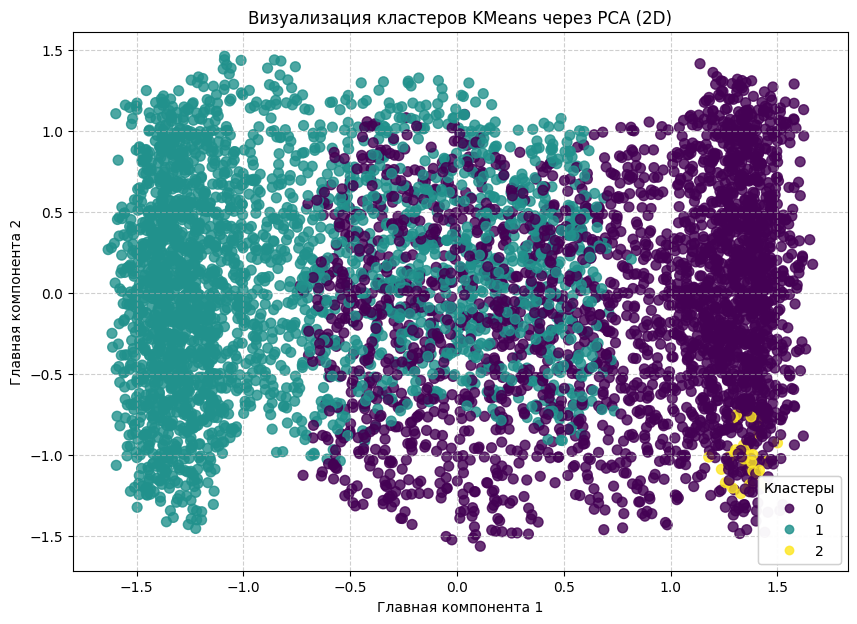

In [349]:
pca_df2 = PCA(n_components=2)
X_pca = pca_df2.fit_transform(X_non_noise)
plt.figure(figsize=(10, 7))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
legend1 = plt.legend(*scatter.legend_elements(), title="Кластеры")
plt.gca().add_artist(legend1)

plt.title('Визуализация кластеров KMeans через PCA (2D)')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('artifacts/figures/PCA(2D)_DATASET02_DBSCAN.jpg')
plt.show()

Рассмотрим 3 датасет

In [245]:
df3.head()

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


In [246]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


In [247]:
df3.describe()

,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


In [248]:
df3.isnull().sum()

sample_id    0
x1           0
x2           0
f_corr       0
f_noise      0
dtype: int64

In [350]:
X = df3.drop('sample_id', axis=1)

In [351]:
X

,x1,x2,f_corr,f_noise
0,-2.710470,4.997107,-1.015703,0.718508
1,8.730238,-8.787416,3.953063,-1.105349
2,-1.079600,-2.558708,0.976628,-3.605776
3,6.854042,1.560181,1.760614,-1.230946
4,9.963812,-8.869921,2.966583,0.915899
...,...,...,...,...
14995,0.445659,-7.395811,1.128535,3.262734
14996,0.258364,-6.267180,1.570404,1.735637
14997,0.104631,-7.394277,0.428989,2.589123
14998,-0.660232,-6.329977,1.420440,2.402324


In [357]:
sample_id_df3 = df3[['sample_id']]

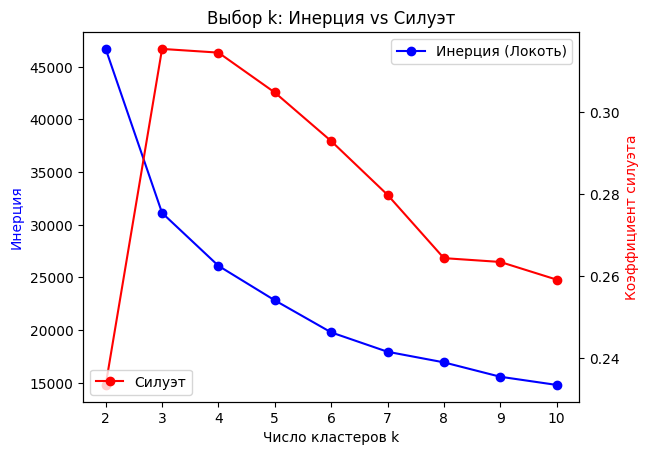

In [252]:
k_values = list(range(2,11))

inertia = []
silhouette = []
for k in k_values:
    kmeans_model = Pipeline([
        ('scaler', StandardScaler()),
         ('KMeans', KMeans(n_clusters=k, n_init='auto', random_state=42))
    ])
    kmeans_model.fit(X)
    inertia.append(kmeans_model[1].inertia_)
    silhouette.append(silhouette_score(kmeans_model[0].transform(X), kmeans_model[1].labels_))
fig, ax1 = plt.subplots()

ax1.plot(k_values, inertia, 'bo-', label='Инерция (Локоть)')
ax1.set_xlabel('Число кластеров k')
ax1.set_ylabel('Инерция', color='b')

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette, 'ro-', label='Силуэт')
ax2.set_ylabel('Коэффициент силуэта', color='r')

plt.title('Выбор k: Инерция vs Силуэт')
ax1.legend(loc='upper right')
ax2.legend(loc='lower left')
plt.savefig('artifacts/figures/K_vs_inertia_silhouette_KMeans_Dataset03.jpg')
plt.show()

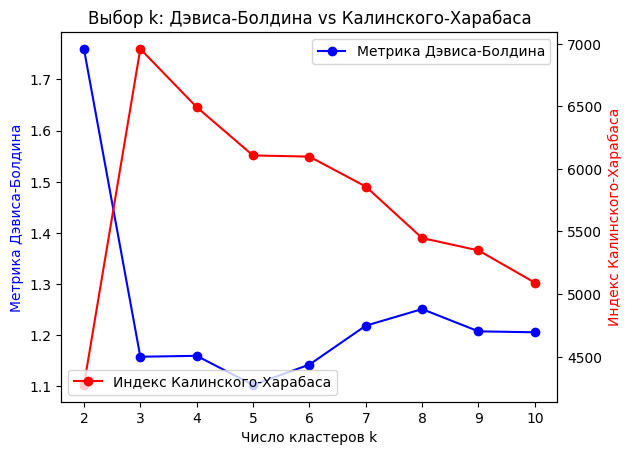

In [253]:
k_values = list(range(2,11))

davies_bouldin = []
calinski_harabasz = []
for k in k_values:
    kmeans_model = Pipeline([
        ('scaler', StandardScaler()),
         ('KMeans', KMeans(n_clusters=k, n_init='auto', random_state=42))
    ])
    kmeans_model.fit(X)
    X_scaled = kmeans_model[0].transform(X)
    labels = kmeans_model[1].labels_
    
    davies_bouldin.append(davies_bouldin_score(X_scaled, labels))
    calinski_harabasz.append(calinski_harabasz_score(X_scaled, labels))

fig, ax1 = plt.subplots()

ax1.plot(k_values, davies_bouldin, 'bo-', label='Метрика Дэвиса-Болдина')
ax1.set_xlabel('Число кластеров k')
ax1.set_ylabel('Метрика Дэвиса-Болдина', color='b')

ax2 = ax1.twinx()
ax2.plot(k_values, calinski_harabasz, 'ro-', label='Индекс Калинского-Харабаса')
ax2.set_ylabel('Индекс Калинского-Харабаса', color='r')

plt.title('Выбор k: Дэвиса-Болдина vs Калинского-Харабаса')
ax1.legend(loc='upper right')
ax2.legend(loc='lower left')
plt.savefig('artifacts/figures/K_vs_DaviesBouldin_CalinskiHarabasz_KMeans_Dataset03.jpg')
plt.show()

Из этих 4 метрик очевидно то, что оптимальное количество кластеров это 3

In [254]:
kmeans_model_df3 = Pipeline([
        ('scaler', StandardScaler()),
         ('KMeans', KMeans(n_clusters=3, n_init='auto', random_state=42))
    ])
kmeans_model_df3.fit(X)
labels = kmeans_model_df3[1].labels_

In [352]:
X_scaled = kmeans_model_df3[0].transform(X)

In [256]:
silhouette_score(X_scaled, labels)

np.float64(0.31553248183109267)

In [257]:
davies_bouldin_score(X_scaled, labels)

np.float64(1.1577832240211112)

In [258]:
calinski_harabasz_score(X_scaled, labels)

np.float64(6957.158106946779)

In [259]:
from scipy.cluster.hierarchy import dendrogram, linkage

Подберем linkage

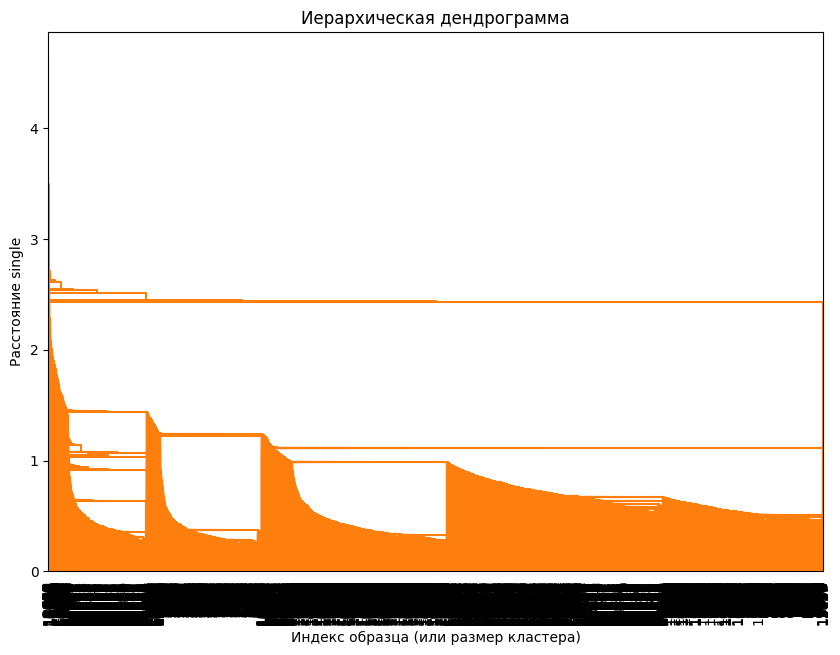

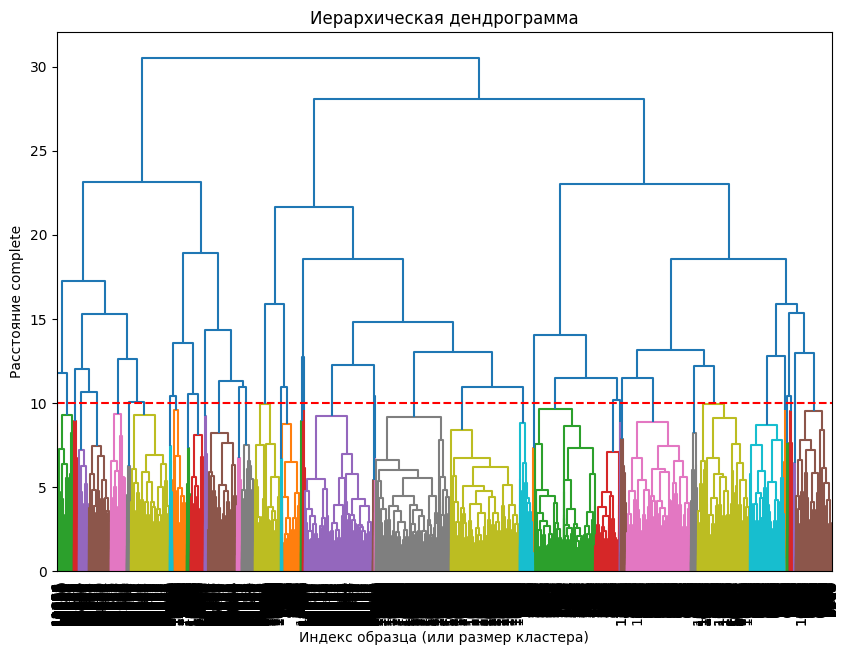

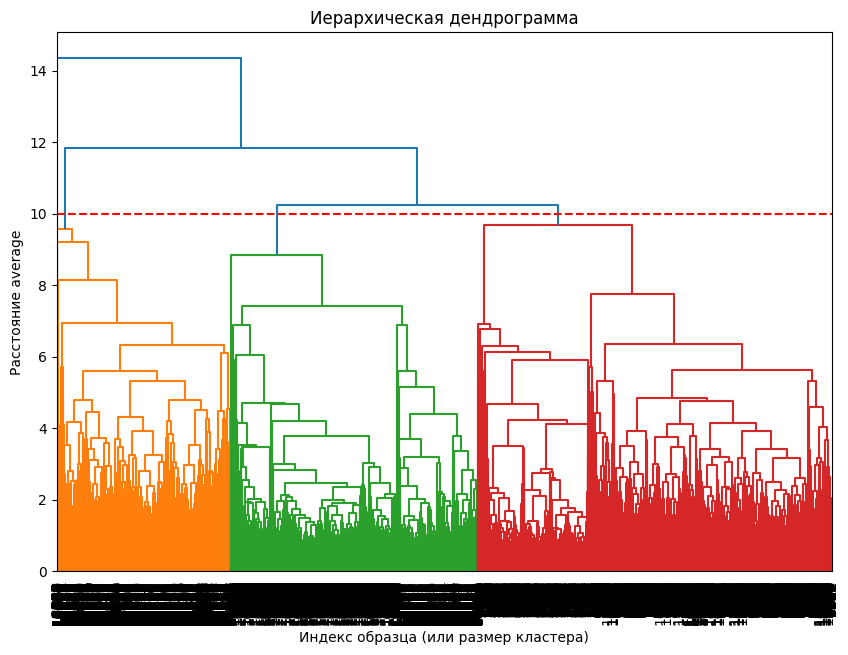

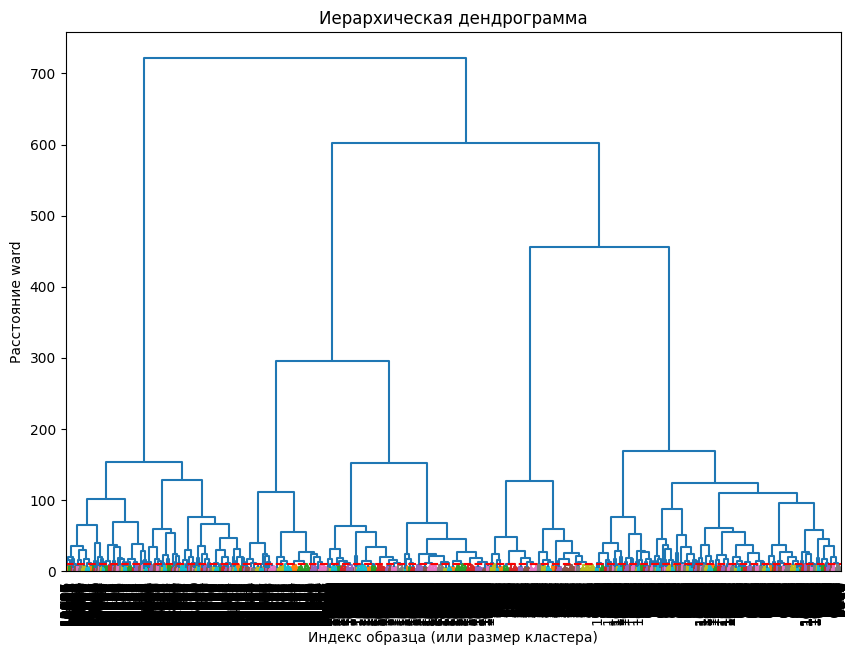

In [262]:
for method in ["single", "complete", "average", "ward"]:

    Z = linkage(X, method=method)
    plt.figure(figsize=(10, 7))
    plt.title("Иерархическая дендрограмма")
    plt.xlabel("Индекс образца (или размер кластера)")
    plt.ylabel(f"Расстояние {method}")
    
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=10.,
        color_threshold=10   
    )
    plt.axhline(y=10, color='r', linestyle='--')
    plt.savefig(f'artifacts/figures/{method}_AgglomerativeClustering_DATASET03.jpg')
    plt.show()

Поскольку данные достаточно зашумлены, мы точно не возьмем метод single, complite дает большое количество неестественных классов, а ward слишком сильно ограничивает кластеры границами, поэтому методом исключения возьмем метод average как самым оптимальный

Подберем количество кластеров

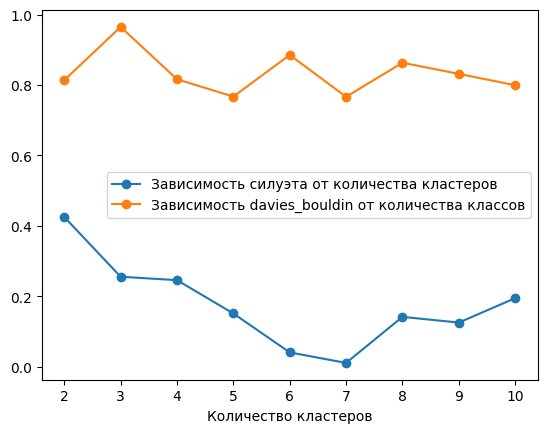

In [315]:
k_values = list(range(2,11))

silhouette = []
davies_bouldin = []
for k in k_values:
    agglomer_model = AgglomerativeClustering(n_clusters=k, linkage='average')
    agglomer_model.fit(X_scaled)
    labels = agglomer_model.labels_
    silhouette.append(silhouette_score(X_scaled, labels))
    davies_bouldin.append(davies_bouldin_score(X_scaled, labels))
plt.plot(k_values, silhouette, label = 'Зависимость силуэта от количества кластеров', marker = 'o')
plt.plot(k_values, davies_bouldin, label = 'Зависимость davies_bouldin от количества классов', marker ='o')
plt.xlabel('Количество кластеров')
plt.legend()
plt.savefig('artifacts/figures/K_vs_silhouette_AgglomerativeClustering_Dataset03.jpg')
plt.show()

Оптимальное количество кластеров 2

In [322]:
agglomer_model_df3 = AgglomerativeClustering(n_clusters=2, linkage='average')
agglomer_model_df3.fit(X_scaled)

AgglomerativeClustering(linkage='average')

In [323]:
labels = agglomer_model_df3.labels_

In [324]:
silhouette_score(X_scaled, labels)

np.float64(0.42529612444453263)

In [325]:
davies_bouldin_score(X_scaled, labels)

np.float64(0.8138020165811181)

In [326]:
calinski_harabasz_score(X_scaled, labels)

np.float64(8.943143115556799)

AgglomerativeClustering по silhouette_score и davies_bouldin_score значительно опережает KMeans, но сильно уступает по calinski_harabasz_score, что может говорить либо о сильной дисперсии в датасете, поэтому можно сказать, что в среднем KMeans сработал лучше

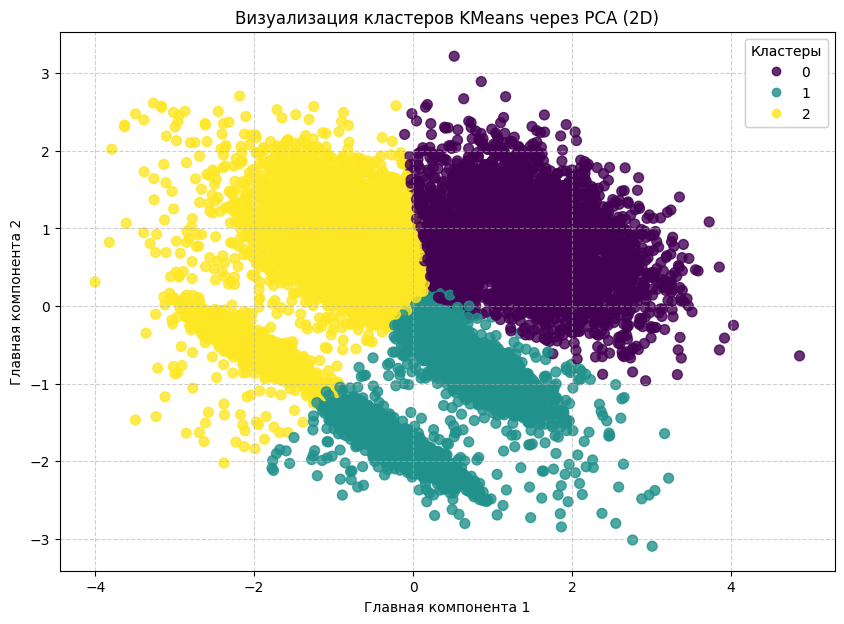

In [327]:
labels = kmeans_model_df3[1].labels_

pca_df3 = PCA(n_components=2)
X_pca = pca_df3.fit_transform(X_scaled)
plt.figure(figsize=(10, 7))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
legend1 = plt.legend(*scatter.legend_elements(), title="Кластеры")
plt.gca().add_artist(legend1)

plt.title('Визуализация кластеров KMeans через PCA (2D)')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('artifacts/figures/PCA(2D)_DATASET03_DBSCAN.jpg')
plt.show()

Посчитаем RMSE отклонение от координат центроид при сиде 42

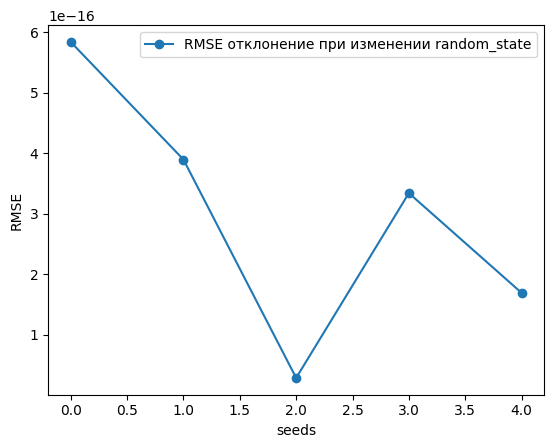

In [354]:
seeds = list(range(5))

main_centroids = kmeans_model_df3[1].cluster_centers_
RMSE = []
for seed in seeds:
    kmeans_model_df3 = Pipeline([
        ('scaler', StandardScaler()),
         ('KMeans', KMeans(n_clusters=3, n_init='auto', random_state=42))
    ])
    kmeans_model_df3.fit(X)
    centroids = kmeans_model_df3[1].cluster_centers_
    RMSE.append((abs(main_centroids - centroids)).sum())
plt.plot(seeds, RMSE, label = 'RMSE отклонение при изменении random_state', marker = 'o')
plt.xlabel('seeds')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('artifacts/figures/RMSE_KMeans_DATASET03.jpg')
plt.show()

In [366]:
labels_best_df1 = kmeans_model_df1[1].labels_

labels_best_df2 = db_model_df2[1].labels_

labels_best_df3 = kmeans_model_df3[1].labels_

res_df1 = pd.concat([sample_id_df1, pd.DataFrame({'cluster_label': labels_best_df1})], axis = 1)
res_df2 = pd.concat([sample_id_df2, pd.DataFrame({'cluster_label': labels_best_df2})], axis = 1)
res_df3 = pd.concat([sample_id_df3, pd.DataFrame({'cluster_label': labels_best_df3})], axis = 1)



In [372]:
res_df1

,sample_id,cluster_label
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
11995,11995,0
11996,11996,1
11997,11997,1
11998,11998,0


In [370]:
res_df1.to_csv('artifacts/labels/labels_hw07_ds1.csv')
res_df2.to_csv('artifacts/labels/labels_hw07_ds2.csv')
res_df3.to_csv('artifacts/labels/labels_hw07_ds3.csv')

In [375]:
import json
def create_metrics_summary_from_separate_datasets(
    X1, X2, X3,
    labels_ds1_kmeans, labels_ds1_dbscan,
    labels_ds2_kmeans, labels_ds2_dbscan,
    labels_ds3_kmeans, labels_ds3_agglo,
    models_ds1_kmeans=None, models_ds1_dbscan=None,
    models_ds2_kmeans=None, models_ds2_dbscan=None,
    models_ds3_kmeans=None, models_ds3_agglo=None,
    output_file="metrics_summary.json"
):
    
    def calculate_metrics_for_model(X, labels, model_name):
        labels = np.array(labels)
        
        n_clusters = len(np.unique(labels[labels != -1]))
        
        metrics = {}
        
        if n_clusters > 1:
            if model_name == "DBSCAN" and -1 in labels:
                valid_mask = labels != -1
                if len(np.unique(labels[valid_mask])) > 1:
                    metrics["silhouette"] = float(silhouette_score(X[valid_mask], labels[valid_mask]))
                else:
                    metrics["silhouette"] = None
            else:
                metrics["silhouette"] = float(silhouette_score(X, labels))
        else:
            metrics["silhouette"] = None
        
        if n_clusters > 1:
            if model_name == "DBSCAN" and -1 in labels:
                valid_mask = labels != -1
                metrics["davies_bouldin"] = float(davies_bouldin_score(X[valid_mask], labels[valid_mask]))
            else:
                metrics["davies_bouldin"] = float(davies_bouldin_score(X, labels))
        else:
            metrics["davies_bouldin"] = None
        
        if n_clusters > 1:
            if model_name == "DBSCAN" and -1 in labels:
                valid_mask = labels != -1
                metrics["calinski_harabasz"] = float(calinski_harabasz_score(X[valid_mask], labels[valid_mask]))
            else:
                metrics["calinski_harabasz"] = float(calinski_harabasz_score(X, labels))
        else:
            metrics["calinski_harabasz"] = None
        
        if model_name == "DBSCAN":
            if -1 in labels:
                noise_ratio = np.sum(labels == -1) / len(labels)
                metrics["noise_ratio"] = float(noise_ratio)
            else:
                metrics["noise_ratio"] = 0.0
        else:
            metrics["noise_ratio"] = None
        
        model_info = {
            "n_clusters": int(n_clusters),
            "n_noise": int(np.sum(labels == -1)) if -1 in labels else 0,
            "labels_shape": labels.shape,
            "metrics": metrics
        }
        
        if model_name == "KMeans" and models_ds1_kmeans is not None:
            model_info["model_params"] = {
                "n_clusters": getattr(models_ds1_kmeans, 'n_clusters', None),
                "random_state": getattr(models_ds1_kmeans, 'random_state', None)
            }
        elif model_name == "DBSCAN" and models_ds1_dbscan is not None:
            model_info["model_params"] = {
                "eps": getattr(models_ds1_dbscan, 'eps', None),
                "min_samples": getattr(models_ds1_dbscan, 'min_samples', None)
            }
        elif model_name == "AgglomerativeClustering" and models_ds3_agglo is not None:
            model_info["model_params"] = {
                "n_clusters": getattr(models_ds3_agglo, 'n_clusters', None),
                "linkage": getattr(models_ds3_agglo, 'linkage', None)
            }
        
        return model_info
    
    summary = {
        "dataset_1": {
            "data_shape": X1.shape,
            "models": {
                "KMeans": calculate_metrics_for_model(X1, labels_ds1_kmeans, "KMeans"),
                "DBSCAN": calculate_metrics_for_model(X1, labels_ds1_dbscan, "DBSCAN")
            }
        },
        "dataset_2": {
            "data_shape": X2.shape,
            "models": {
                "KMeans": calculate_metrics_for_model(X2, labels_ds2_kmeans, "KMeans"),
                "DBSCAN": calculate_metrics_for_model(X2, labels_ds2_dbscan, "DBSCAN")
            }
        },
        "dataset_3": {
            "data_shape": X3.shape,
            "models": {
                "KMeans": calculate_metrics_for_model(X3, labels_ds3_kmeans, "KMeans"),
                "AgglomerativeClustering": calculate_metrics_for_model(X3, labels_ds3_agglo, "AgglomerativeClustering")
            }
        }
    }
    
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(summary, f, indent=2, ensure_ascii=False)
    
    print(f"Сводка метрик сохранена в файл: {output_file}")
    
    print("\nКраткая статистика по датасетам:")
    for ds_name, ds_info in summary.items():
        print(f"\n{ds_name}:")
        print(f"  Размер данных: {ds_info['data_shape']}")
        for model_name, model_info in ds_info["models"].items():
            print(f"  {model_name}:")
            print(f"    Кластеров: {model_info['n_clusters']}")
            if model_info['n_noise'] > 0:
                print(f"    Шумных точек: {model_info['n_noise']}")
            if model_info['metrics']['silhouette'] is not None:
                print(f"    Silhouette: {model_info['metrics']['silhouette']:.4f}")
    
    return summary

X1 = StandardScaler().fit_transform(df1.drop('sample_id', axis=1))
X2 = StandardScaler().fit_transform(df2.drop('sample_id', axis=1))
X3 = StandardScaler().fit_transform(df3.drop('sample_id', axis=1))
metrics_summary = create_metrics_summary_from_separate_datasets(
    X1=X1,
    X2=X2,
    X3=X3,
    labels_ds1_kmeans=kmeans_model_df1[1].labels_,labels_ds1_dbscan=db_model_df1[1].labels_,
    labels_ds2_kmeans=kmeans_model_df2[1].labels_,labels_ds2_dbscan=db_model_df2[1].labels_,
    labels_ds3_kmeans=kmeans_model_df3[1].labels_,labels_ds3_agglo=agglomer_model_df3.labels_,
    models_ds1_kmeans=kmeans_model_df1[1],models_ds1_dbscan=db_model_df1[1],
    models_ds2_kmeans=kmeans_model_df2[1],models_ds2_dbscan=db_model_df2[1],
    models_ds3_kmeans=kmeans_model_df3[1],models_ds3_agglo=agglomer_model_df3,
    output_file='artifacts/metrics_summary.json'
)

Сводка метрик сохранена в файл: artifacts/metrics_summary.json

Краткая статистика по датасетам:

dataset_1:
  Размер данных: (12000, 8)
  KMeans:
    Кластеров: 2
    Silhouette: 0.5216
  DBSCAN:
    Кластеров: 6
    Шумных точек: 3774
    Silhouette: 0.3709

dataset_2:
  Размер данных: (8000, 3)
  KMeans:
    Кластеров: 6
    Silhouette: 0.2678
  DBSCAN:
    Кластеров: 3
    Шумных точек: 2449
    Silhouette: 0.1952

dataset_3:
  Размер данных: (15000, 4)
  KMeans:
    Кластеров: 3
    Silhouette: 0.3155
  AgglomerativeClustering:
    Кластеров: 2
    Silhouette: 0.4253


In [383]:
import json

def create_best_configs_summary(metrics_summary, output_file="best_configs.json", custom_criteria_order=None):
    best_configs = {}
    
    for dataset_name, dataset_info in metrics_summary.items():
        models_metrics = dataset_info.get('models', {})
        
        if "dataset_1" in dataset_name or dataset_name == "1" or "first" in dataset_name.lower():
            best_model_name = "KMeans"
        elif "dataset_2" in dataset_name or dataset_name == "2" or "second" in dataset_name.lower():
            best_model_name = "DBSCAN"
        elif "dataset_3" in dataset_name or dataset_name == "3" or "third" in dataset_name.lower():
            best_model_name = "KMeans"
        else:
            best_model_name = list(models_metrics.keys())[0] if models_metrics else "Unknown"
        
        best_model_info = {}
        if best_model_name in models_metrics:
            metrics_info = models_metrics[best_model_name]
            model_metrics = metrics_info.get('metrics', {})
            
            best_criterion = None
            best_value = None
            
            if custom_criteria_order:
                criteria_to_check = custom_criteria_order
            else:
                criteria_to_check = ['silhouette', 'calinski_harabasz', 'davies_bouldin']
            
            for criterion in criteria_to_check:
                if criterion in model_metrics and model_metrics[criterion] is not None:
                    best_criterion = criterion
                    best_value = model_metrics[criterion]
                    break
            
            if best_criterion is None:
                for metric_name, metric_value in model_metrics.items():
                    if metric_value is not None and metric_name in ['silhouette', 'davies_bouldin', 'calinski_harabasz']:
                        best_criterion = metric_name
                        best_value = metric_value
                        break
            
            if best_criterion is None:
                best_criterion = "manual_selection"
            
            if best_criterion == 'davies_bouldin' and best_value is not None:
                display_value = -best_value
            elif best_value is not None:
                display_value = best_value
            else:
                display_value = None
            
            best_model_info = {
                "selected_model": best_model_name,
                "selection_criteria": best_criterion,
                "selected_metric_value": display_value,
                "n_clusters": metrics_info.get('n_clusters', 0),
                "n_noise": metrics_info.get('n_noise', 0),
                "model_params": metrics_info.get('model_params', {})
            }
        else:
            best_model_info = {
                "selected_model": best_model_name,
                "selection_criteria": "manual_selection",
                "selected_metric_value": None,
                "n_clusters": 0,
                "n_noise": 0,
                "model_params": {}
            }
        
        best_configs[dataset_name] = {
            "data_shape": dataset_info.get('data_shape', 'unknown'),
            "best_model": best_model_info,
            "all_models_evaluation": {}
        }
        
        for model_name, metrics_info in models_metrics.items():
            model_metrics = metrics_info.get('metrics', {})
            best_configs[dataset_name]["all_models_evaluation"][model_name] = {
                "n_clusters": metrics_info.get('n_clusters', 0),
                "n_noise": metrics_info.get('n_noise', 0),
                "silhouette": model_metrics.get('silhouette'),
                "davies_bouldin": model_metrics.get('davies_bouldin'),
                "calinski_harabasz": model_metrics.get('calinski_harabasz'),
                "noise_ratio": model_metrics.get('noise_ratio')
            }
    
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(best_configs, f, indent=2, ensure_ascii=False)
    
    print(f"Сводка лучших конфигураций сохранена в файл: {output_file}")
    
    print("\nЛучшие конфигурации для каждого датасета:")
    print("=" * 60)
    
    for dataset_name, config in best_configs.items():
        best_model = config["best_model"]
        print(f"\n{dataset_name}:")
        print(f"  Лучшая модель: {best_model['selected_model']}")
        print(f"  Критерий выбора: {best_model['selection_criteria']}")
        
        if best_model['selected_metric_value'] is not None:
            if best_model['selection_criteria'] == 'davies_bouldin':
                # Показываем оригинальное значение davies_bouldin
                original_value = -best_model['selected_metric_value']
                print(f"  Значение метрики: {original_value:.4f} (отображено как {-original_value:.4f})")
            else:
                print(f"  Значение метрики: {best_model['selected_metric_value']:.4f}")
        
        print(f"  Количество кластеров: {best_model['n_clusters']}")
        
        if best_model.get('n_noise', 0) > 0:
            print(f"  Шумных точек: {best_model['n_noise']}")
        
        if best_model.get('model_params'):
            print(f"  Параметры модели:")
            for param, value in best_model['model_params'].items():
                print(f"    {param}: {value}")
    
    return best_configs



    
    print("\n" + "=" * 60)
    print("Структура созданного JSON файла:")
    print(json.dumps(best_configs, indent=2, ensure_ascii=False)[:1000] + "...")

create_best_configs_summary(metrics_summary=metrics_summary, output_file='artifacts/best_configs.json')

Сводка лучших конфигураций сохранена в файл: artifacts/best_configs.json

Лучшие конфигурации для каждого датасета:

dataset_1:
  Лучшая модель: KMeans
  Критерий выбора: silhouette
  Значение метрики: 0.5216
  Количество кластеров: 2
  Параметры модели:
    n_clusters: 2
    random_state: 42

dataset_2:
  Лучшая модель: DBSCAN
  Критерий выбора: silhouette
  Значение метрики: 0.1952
  Количество кластеров: 3
  Шумных точек: 2449
  Параметры модели:
    eps: 0.4
    min_samples: 16

dataset_3:
  Лучшая модель: KMeans
  Критерий выбора: silhouette
  Значение метрики: 0.3155
  Количество кластеров: 3
  Параметры модели:
    n_clusters: 2
    random_state: 42


{'dataset_1': {'data_shape': (12000, 8),
  'best_model': {'selected_model': 'KMeans',
   'selection_criteria': 'silhouette',
   'selected_metric_value': 0.5216395622404242,
   'n_clusters': 2,
   'n_noise': 0,
   'model_params': {'n_clusters': 2, 'random_state': 42}},
  'all_models_evaluation': {'KMeans': {'n_clusters': 2,
    'n_noise': 0,
    'silhouette': 0.5216395622404242,
    'davies_bouldin': 0.6853295219054457,
    'calinski_harabasz': 11786.954622671532,
    'noise_ratio': None},
   'DBSCAN': {'n_clusters': 6,
    'n_noise': 3774,
    'silhouette': 0.37094709104884954,
    'davies_bouldin': 0.9579347132872101,
    'calinski_harabasz': 5563.126364203319,
    'noise_ratio': 0.3145}}},
 'dataset_2': {'data_shape': (8000, 3),
  'best_model': {'selected_model': 'DBSCAN',
   'selection_criteria': 'silhouette',
   'selected_metric_value': 0.19523051842190092,
   'n_clusters': 3,
   'n_noise': 2449,
   'model_params': {'eps': 0.4, 'min_samples': 16}},
  'all_models_evaluation': {'KMea